In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

In [ ]:
data1 = pd.read_excel('PV_generation1_24h_test.xlsx')
#1번째 데이터 불러오기
data1 = pd.DataFrame(data1)
#데이터 프레임화 시키기
data1
#정은아 여기보면 데이터가 어떻게 나와있는지 보여주는 거야.

,LocalTime,Power(MW)
0,2001-01-06 00:00:00,0.0
1,2001-01-06 00:05:00,0.0
2,2001-01-06 00:10:00,0.0
3,2001-01-06 00:15:00,0.0
4,2001-01-06 00:20:00,0.0
...,...,...
283,2001-01-06 23:35:00,0.0
284,2001-01-06 23:40:00,0.0
285,2001-01-06 23:45:00,0.0
286,2001-01-06 23:50:00,0.0


In [ ]:
data1.isnull().sum()
#여기는 데이터 결측값을 파악하는데 지금 보면 데이터가 10개가 비어있다는 뜻이야.

LocalTime     0
Power(MW)    10
dtype: int64

In [ ]:
data2 = pd.read_excel('PV_generation2_24h_test.xlsx')
#첫번쨰랑 동일하게
data2 = pd.DataFrame(data2)
data2

,LocalTime,Power(MW)
0,2001-01-06 00:00:00,0.0
1,2001-01-06 00:05:00,0.0
2,2001-01-06 00:10:00,0.0
3,2001-01-06 00:15:00,0.0
4,2001-01-06 00:20:00,0.0
...,...,...
283,2001-01-06 23:35:00,0.0
284,2001-01-06 23:40:00,0.0
285,2001-01-06 23:45:00,0.0
286,2001-01-06 23:50:00,0.0


In [ ]:
data3 = pd.read_excel('PV_generation3_24h_test.xlsx')
data3 = pd.DataFrame(data3)
data3

,LocalTime,Power(MW)
0,2001-01-06 00:00:00,0.0
1,2001-01-06 00:05:00,0.0
2,2001-01-06 00:10:00,0.0
3,2001-01-06 00:15:00,0.0
4,2001-01-06 00:20:00,0.0
...,...,...
283,2001-01-06 23:35:00,0.0
284,2001-01-06 23:40:00,0.0
285,2001-01-06 23:45:00,0.0
286,2001-01-06 23:50:00,0.0


In [ ]:
data4 = pd.read_excel('PV_generation4_24h_test.xlsx')
data4 = pd.DataFrame(data4)
data4

,LocalTime,Power(MW)
0,2001-01-06 00:00:00,0.0
1,2001-01-06 00:05:00,0.0
2,2001-01-06 00:10:00,0.0
3,2001-01-06 00:15:00,0.0
4,2001-01-06 00:20:00,0.0
...,...,...
283,2001-01-06 23:35:00,0.0
284,2001-01-06 23:40:00,0.0
285,2001-01-06 23:45:00,0.0
286,2001-01-06 23:50:00,0.0


In [ ]:
data5 = pd.read_excel('PV_generation5_24h_test.xlsx')
data5 = pd.DataFrame(data5)
data5

,LocalTime,Power(MW)
0,2001-01-06 00:00:00,0.0
1,2001-01-06 00:05:00,0.0
2,2001-01-06 00:10:00,0.0
3,2001-01-06 00:15:00,0.0
4,2001-01-06 00:20:00,0.0
...,...,...
283,2001-01-06 23:35:00,0.0
284,2001-01-06 23:40:00,0.0
285,2001-01-06 23:45:00,0.0
286,2001-01-06 23:50:00,0.0


In [ ]:
print(data1.isnull().sum())
print(data2.isnull().sum())
print(data3.isnull().sum())
print(data4.isnull().sum())
print(data5.isnull().sum())
# 각 데이터가 보니 10개씩 모자르대

LocalTime     0
Power(MW)    10
dtype: int64
LocalTime     0
Power(MW)    10
dtype: int64
LocalTime     0
Power(MW)    10
dtype: int64
LocalTime     0
Power(MW)    10
dtype: int64
LocalTime     0
Power(MW)    10
dtype: int64


In [ ]:
data_1 = data1["Power(MW)"]
data_1_null = np.where(data_1.isnull())
ind = []
for(int i = 0; i< data_1.length;i++){
    if(data_1[i] == nan){
        ind.append(i)
    }
}

new_data_1 = np.array(data_1)
print(data_1_null)
for i in range(len(data_1_null)):
  a = new_data_1[data_1_null[i]-1]
  b = new_data_1[data_1_null[i]+1]
  print(interpolation(a,b))
  data1["Power(MW)"][data_1_null[i]] = interpolation(a,b)
#보간법을 통해서 이제 데이터를 채워넣는건데 연속으로 데이터가 빈값이 없어서 빈값 기준 전값과 다음값을 통해서 선형보간 시킨거야.

(array([106, 111, 118, 122, 129, 144, 151, 158, 167, 172]),)
[36.55 46.45 55.55 58.8  62.1  64.15 63.5  61.35 55.3  52.15]


In [ ]:
data_2 = data2["Power(MW)"]
data_2_null = np.where(data_2.isnull())
new_data_2 = np.array(data_2)
for i in range(len(data_2_null)):
  a = new_data_2[data_2_null[i]-1]
  b = new_data_2[data_2_null[i]+1]
  data2["Power(MW)"][data_2_null[i]] = interpolation(a,b)
data2.isnull().sum()

LocalTime    0
Power(MW)    0
dtype: int64

In [ ]:
data_3 = data3["Power(MW)"]
data_3_null = np.where(data_3.isnull())
new_data_3 = np.array(data_3)
for i in range(len(data_3_null)):
  a = new_data_3[data_3_null[i]-1]
  b = new_data_3[data_3_null[i]+1]
  data3["Power(MW)"][data_3_null[i]] = interpolation(a,b)
data3.isnull().sum()

LocalTime    0
Power(MW)    0
dtype: int64

In [ ]:
data_4 = data4["Power(MW)"]
data_4_null = np.where(data_4.isnull())
new_data_4 = np.array(data_4)
for i in range(len(data_4_null)):
  a = new_data_4[data_4_null[i]-1]
  b = new_data_4[data_4_null[i]+1]
  data4["Power(MW)"][data_4_null[i]] = interpolation(a,b)
data4.isnull().sum()

LocalTime    0
Power(MW)    0
dtype: int64

In [ ]:
data_5 = data5["Power(MW)"]
data_5_null = np.where(data_5.isnull())
new_data_5 = np.array(data_5)
for i in range(len(data_5_null)):
  a = new_data_5[data_5_null[i]-1]
  b = new_data_5[data_5_null[i]+1]
  data5["Power(MW)"][data_5_null[i]] = interpolation(a,b)
data5.isnull().sum()

LocalTime    0
Power(MW)    0
dtype: int64

In [ ]:
def interpolation(a,b):
  return (a + b) / 2

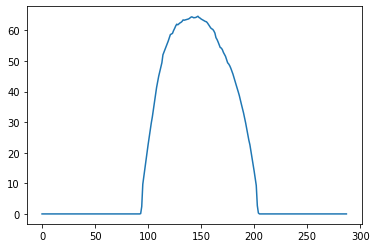

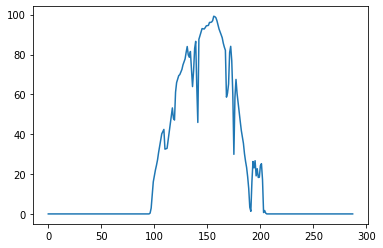

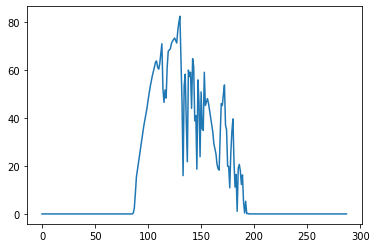

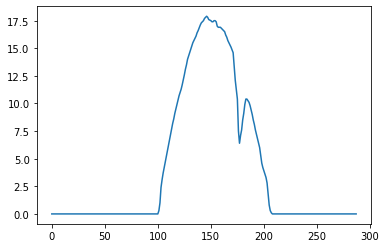

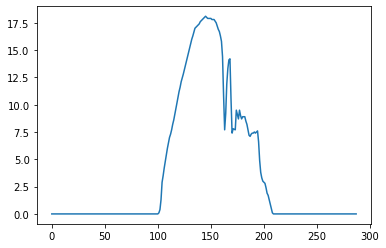

In [ ]:

a = np.arange(len(data1["Power(MW)"]))
plt.plot(a,data1["Power(MW)"])
plt.show()
plt.plot(a,data2["Power(MW)"])
plt.show()
plt.plot(a,data3["Power(MW)"])
plt.show()
plt.plot(a,data4["Power(MW)"])
plt.show()
plt.plot(a,data5["Power(MW)"])
plt.show()
#데이터 시각화해볼려고 작성한코드야.

In [ ]:
data1["Power(MW)2"] = data2["Power(MW)"]
data1["Power(MW)3"] = data3["Power(MW)"]
data1["Power(MW)4"] = data4["Power(MW)"]
data1["Power(MW)5"] = data5["Power(MW)"]
data_mat = np.array(data1)
data_mat = data_mat[:,1:]
data_mat

array([[0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [ ]:
def mean(data,x):
    sum = 0
    for i in range(x):
        sum += data[i]
    sum = sum / x
    return sum
#평균을 구하는 공식이야.    

In [ ]:
data1_mean = mean(data_mat[:,0],len(data_mat[:,0]))
data1_mean

18.02395833333333

In [ ]:
data2_mean = mean(data_mat[:,1],len(data_mat[:,1]))
data2_mean

21.199131944444435

In [ ]:
data3_mean = mean(data_mat[:,2],len(data_mat[:,2]))
data3_mean

15.461111111111109

In [ ]:
data4_mean = mean(data_mat[:,3],len(data_mat[:,3]))
data4_mean

4.12361111111111

In [ ]:
data5_mean = mean(data_mat[:,4],len(data_mat[:,4]))
data5_mean
#이렇게 각 평균을 구해준 다음에!!

3.897048611111111

In [ ]:
def cov(x, y):
    xbar, ybar = mean(x,len(x)), mean(y,len(y))
    return ((x - xbar)*(y - ybar)).sum() / (len(data_mat) - 1)
def cov_matrix(data):
    col = data.shape[1]
    matrix = []
    for i in range(col):
        for j in range(col):
            matrix.append(cov(data[:,i], data[:,j]))
    return matrix


In [ ]:
cor = cov_matrix(data_mat)
cor = np.array(cor).reshape(5, 5)
cor

array([[ 640.51567835,  797.09749474,  509.85481127,  152.99765534,
         146.80801521],
       [ 797.09749474, 1078.28178496,  610.05761421,  198.54826099,
         189.50656537],
       [ 509.85481127,  610.05761421,  565.58196671,  109.02242838,
         107.57103465],
       [ 152.99765534,  198.54826099,  109.02242838,   39.2481688 ,
          37.15341488],
       [ 146.80801521,  189.50656537,  107.57103465,   37.15341488,
          36.58686408]])

In [ ]:
corr = np.corrcoef(cor)
corr

array([[1.        , 0.99554606, 0.951957  , 0.99397707, 0.99602688],
       [0.99554606, 1.        , 0.92582729, 0.99877139, 0.99920979],
       [0.951957  , 0.92582729, 1.        , 0.91364925, 0.92203133],
       [0.99397707, 0.99877139, 0.91364925, 1.        , 0.99975023],
       [0.99602688, 0.99920979, 0.92203133, 0.99975023, 1.        ]])

In [ ]:
from numpy import linalg as LA
w, v = LA.eig(cor)

print(w)

#고유벡터와 고유값 구하는 라이브러리야/

[2.16635246e+03 1.64898852e+02 2.59207539e+01 2.44109306e+00
 6.01300468e-01]
